In [1]:
pwd

'/gpfs/easy/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/example'

In [2]:
import numpy as np
import pylab as plt

import sys
sys.path.append('/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/')
from Plot_utilities import *
from Object_utilities import *
from PostProcessing import *

from Orthogonalization_real_space import *
from StrainTiltCalculation import *

from CreateVTI import *

my_cmap = MIR_Colormap()

In [3]:
# path_reconstruction = 'Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5/'
path_reconstruction = 'Reconstructions_CropAlgo/Pd_GC_0002_scan64/'

In [4]:
obj_list, llk_list, file_list = load_reconstructions(path_reconstruction)
print(len(obj_list))

# Sort the obj_list array if you want (can take a bit of time for 3D data)
# metric_string = 'module_std'
metric_string = 'module max position'
obj_list, llk_list, file_list = sort_object_list_metric(obj_list, llk_list=llk_list, file_list=file_list,
                                                        metric_string = metric_string)

3


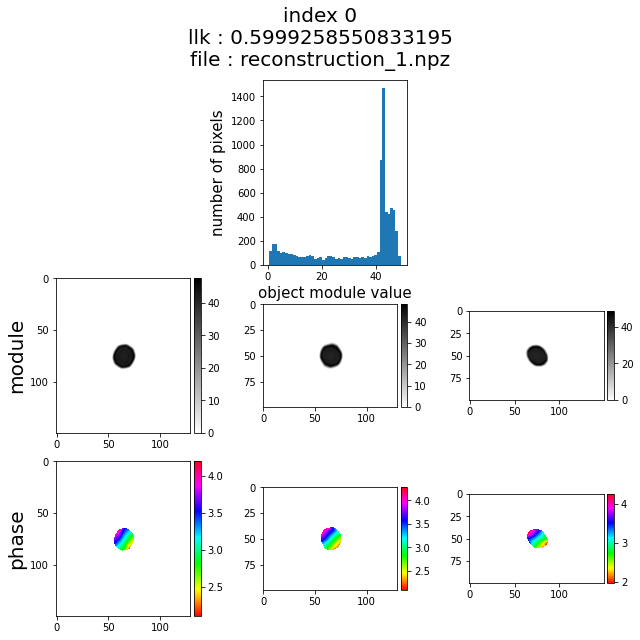

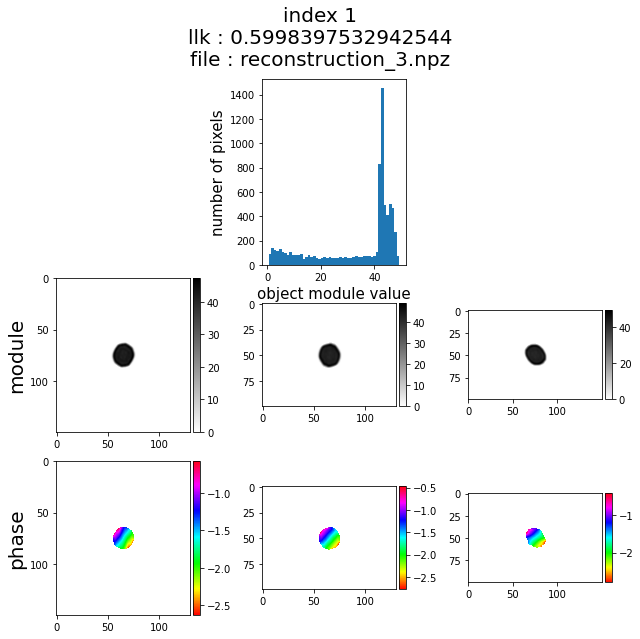

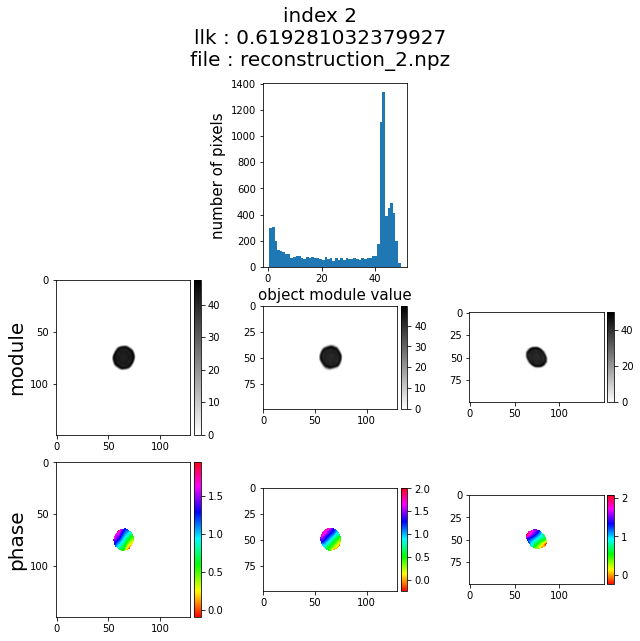

In [5]:
for n,obj in enumerate(obj_list[:6]):
# for n,obj in enumerate(obj_list):
    fig,ax = plt.subplots(3,3, figsize=(9,9))
    plot_2D_slices_middle_and_histogram(obj, fig=fig, ax=ax)
    fig.suptitle('index {}\nllk : {}\nfile : {}'.format(n, llk_list[n], file_list[n].split('/')[-1]), fontsize=20)
    fig.tight_layout()

object 1 conj_index 0 : 100 %
object 1 conj_index 1 : 99 %
object 2 conj_index 0 : 100 %
object 2 conj_index 1 : 100 %

conj_index :  [0, 0, 1]
mode 1 : 99.86 %
mode 2 : 0.1 %
mode 3 : 0.04 %
oversampling ratio : [4.34782609 6.52173913 6.19047619]


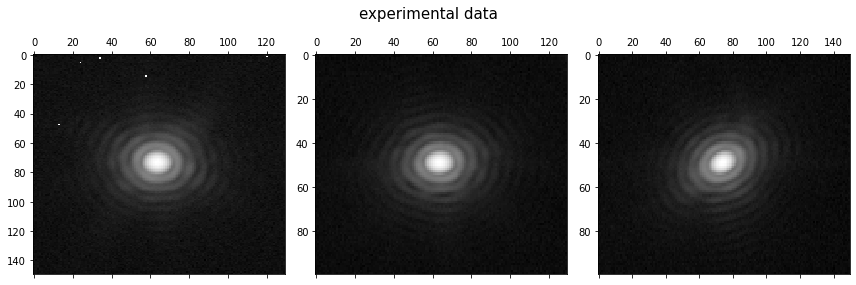

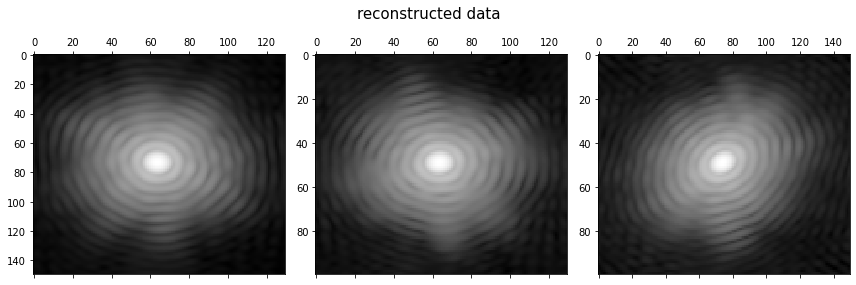

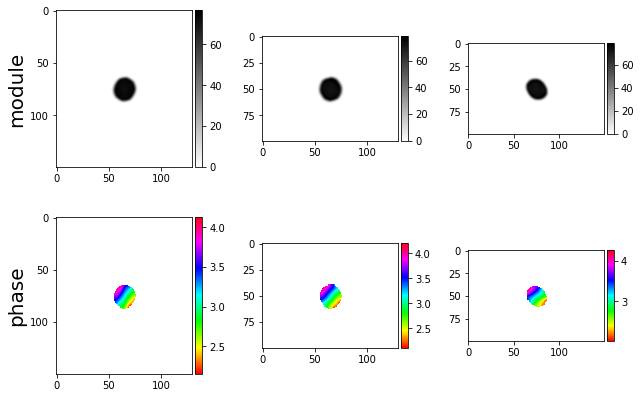

In [6]:
oversampling_check = True
apodization = True
large_phase_ramp = False

index_best_recon = [0,1,2] 
conj_index = 'auto'


obj, file_ref, weights = combine_reconstructions(file_list, index_best_recon,
                            conj_index=conj_index, conj_index_start=0,
                            apodization = apodization,
                            large_phase_ramp = large_phase_ramp)

In [7]:
# axis = 1
# interactive_3d_object(obj, axis=axis, threshold_module=.3)

In [46]:
# %matplotlib inline

# Real space orthogonalization

rotate axes such that the Bragg is along the last axis
voxel size (Angstrom) :  [83.78494889 61.44073982 87.45265689]


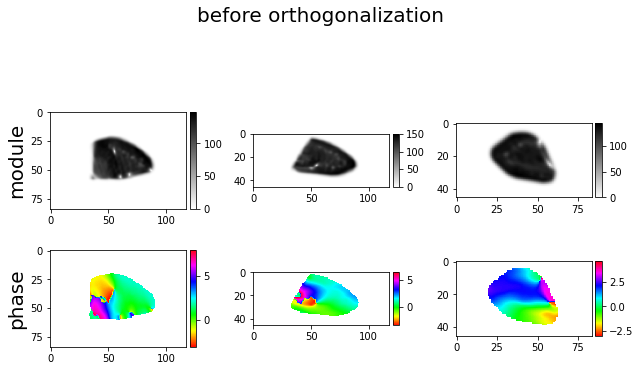

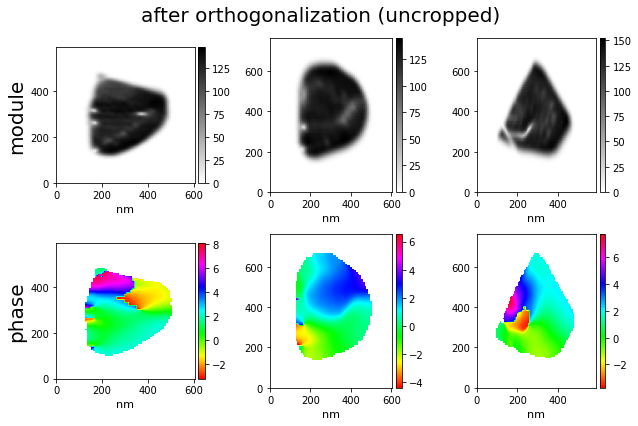

In [47]:
rotate_bragg_to_last_axis = False # True
# Maybe better to keep it to False

voxel_sizes = None # 100 # [100,120,130]

obj_ortho, voxel_sizes, qcen = real_space_orthogonalization(obj, file_ref, 
                                                            voxel_sizes = voxel_sizes,
                                                            rotate_bragg_to_last_axis=rotate_bragg_to_last_axis,
                                                            
                                 plot=True)

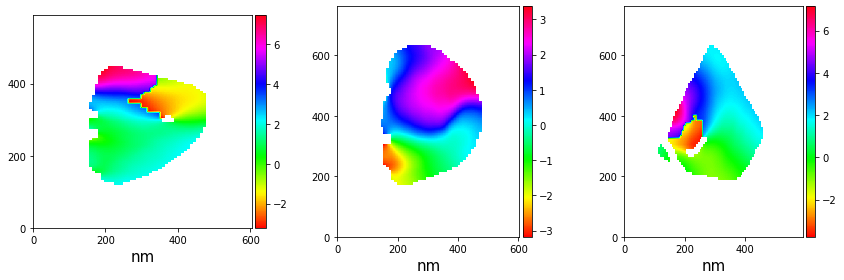

In [48]:
# Select a threshold_module to get a clean phase
threshold_module = .4
# threshold_module = .4
plot_2D_slices_middle_only_phase(obj_ortho, threshold_module=threshold_module, voxel_sizes=voxel_sizes, fw=4,
                                 crop=False)

module_ortho, phase_ortho = get_cropped_module_phase(obj_ortho, crop=False, unwrap=True, threshold_module=threshold_module)

In [49]:
phase_ramp_removal = False

if phase_ramp_removal:
    obj_ortho = remove_phase_ramp(obj_ortho,
                          threshold_module=threshold_module,
                          crop=False,
                          return_ramp=False,
                          plot=False)

take into account defects


/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/StrainTiltCalculation.py:26: RuntimeWarning: Mean of empty slice
  grad_n = np.nanmean([grad_n[tuple(slice1)], grad_n[tuple(slice2)]], axis=0)


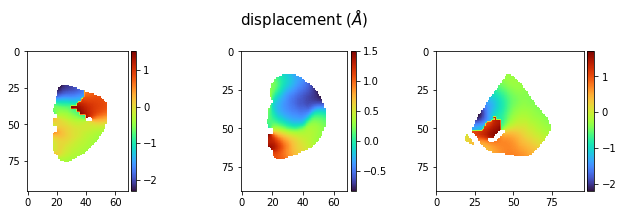

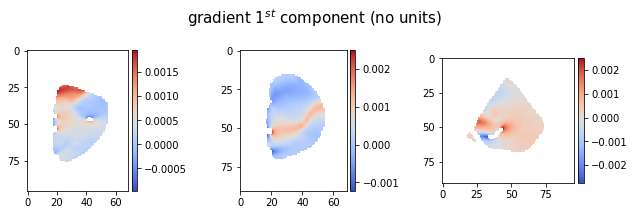

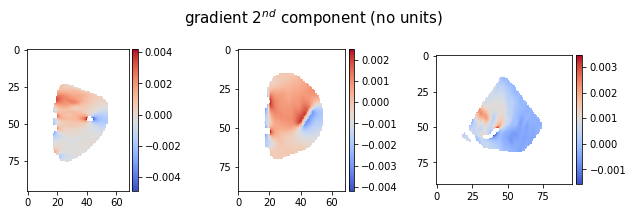

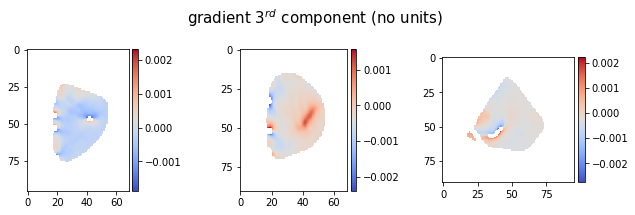

In [50]:
defect = True

displacement, grad = displacement_and_gradient(obj_ortho, qcen,
                              voxel_sizes=voxel_sizes,
                              unwrap=True, crop=False, threshold_module=threshold_module,
                              use_negative_phase=True,
                              defect=defect, phase_shift=np.pi/2.,
                                              plot=True)

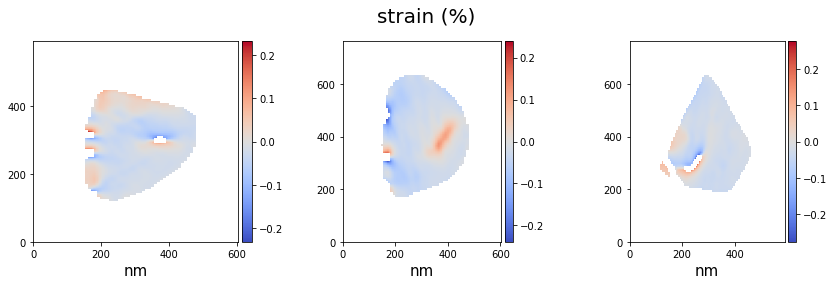

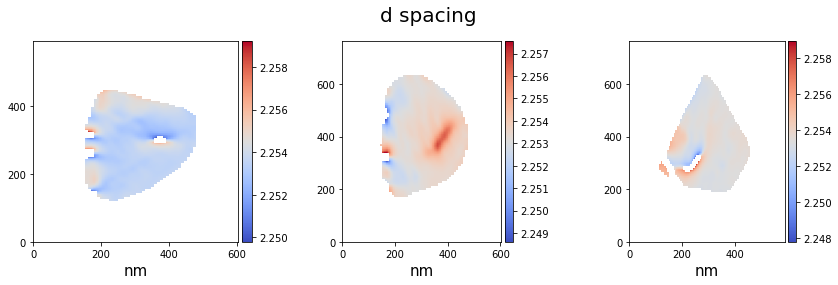

In [51]:
strain, d_spacing = compute_strain(grad, qcen, plot=True, voxel_sizes=voxel_sizes)

In [52]:
# Center the strain if needed
strain = strain - np.nanmean(strain)

In [53]:
# axis = 2
# interactive_3d_array(d_spacing, axis=axis, voxel_sizes=voxel_sizes)

In [54]:
# %matplotlib inline

# Tilt maps

e_bragg :  [1.64969010e-18 2.85236581e-17 1.00000000e+00]
e1 :  [ 1.0000000e+00  0.0000000e+00 -1.6496901e-18]
e2 :  [-4.70551963e-35  1.00000000e+00 -2.85236581e-17]
all values below should be 1
check 1 1.0
check 2 1.0
check 3 1.0

all values below should be 0
check 4 0.0
check 5 0.0
check 6 -1.6473362998925973e-51


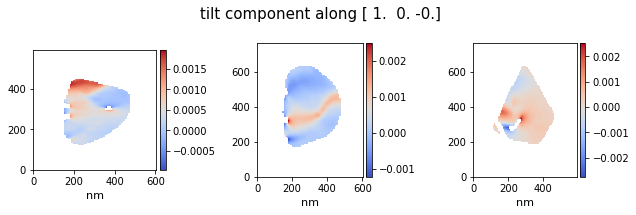

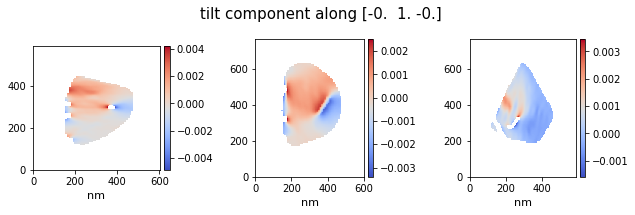

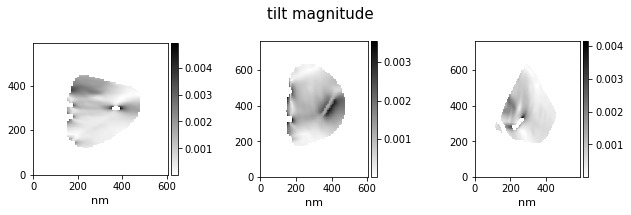

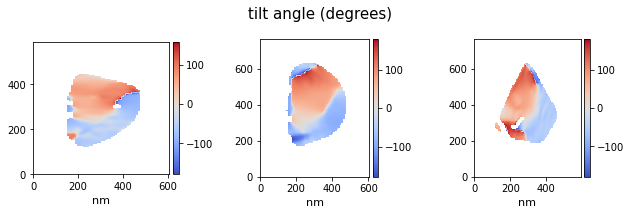

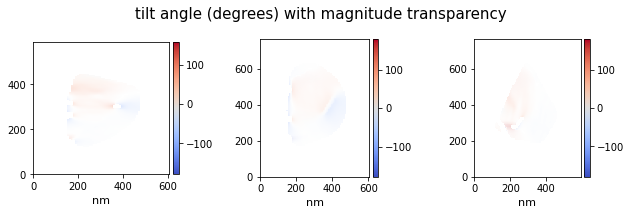

In [55]:
tilt_comp1, tilt_comp2, tilt_magn, tilt_angle, e1, e2 = compute_tilt(grad, qcen,
                                     polar_representation=True,
                 check=True, plot=True, voxel_sizes=voxel_sizes)

# Make a nice figure

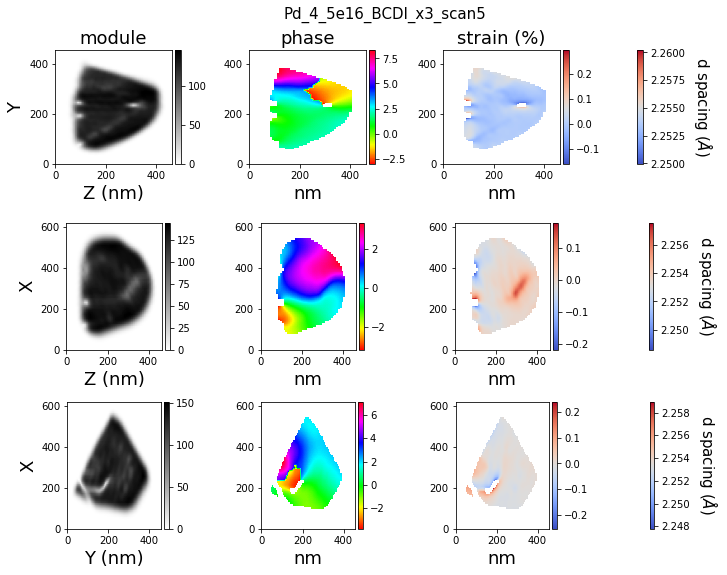

In [56]:
# final_figure_version3(module_ortho, phase_ortho, 
#                       strain, d_spacing,
#                  voxel_sizes=voxel_sizes, fig_title=path_reconstruction.split('/')[-2])

final_figure_version4(module_ortho, phase_ortho,
                      strain, d_spacing,
                      tilt_magn,
                 voxel_sizes=voxel_sizes, fig_title=path_reconstruction.split('/')[-2],
                     make_roi=False)

In [57]:
# final_figure_version2(module_ortho, phase_ortho, 
#                       strain,
#                           tilt_comp1, tilt_comp2, 
#                  voxel_sizes=voxel_sizes)

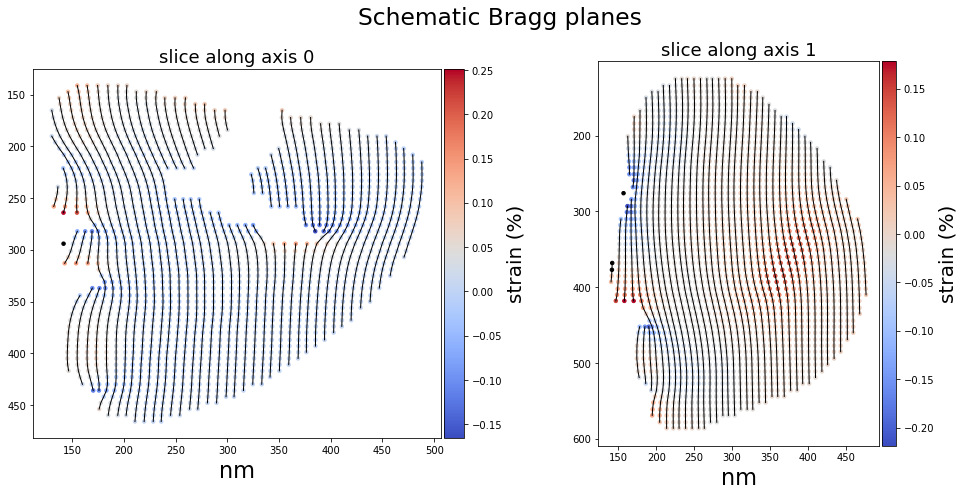

In [58]:
# visual_factor = 200
# dislo_threshold = 10

# final_figure_schematic_Bragg_planes(displacement, qcen, voxel_sizes,
#                                   strain=strain,
#                                   visual_factor=visual_factor, dislo_threshold=dislo_threshold,
#                                   close_roi=True, fw=7)

In [ ]:
plot_strain_histo(strain)

Maybe could change the object orientation since Bragg is often vertical in the lab frame. To be seen later.

/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/Plot_utilities.py:984: RuntimeWarning: Mean of empty slice
  surface_strain = np.nanmean(surface_strain, axis=axis)
/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/Plot_utilities.py:1038: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


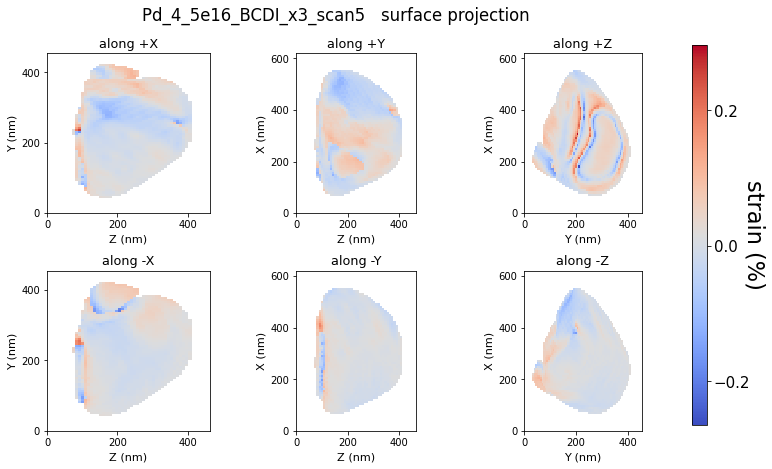

In [59]:
roi = automatic_object_roi(obj_ortho, factor=.2)

plot_surface_projections(apply_roi(strain, roi), voxel_sizes, fig_title=path_reconstruction.split('/')[-2],
                        vmin=None, vmax=None)

# Save the object

In [60]:
additional_dict = {}
additional_dict['mode'] = weights
additional_dict['qcen_labspace'] = file_ref['qcen']
additional_dict['qcen'] = qcen
additional_dict['module_ortho'] = module_ortho
additional_dict['phase_ortho'] = phase_ortho
additional_dict['displacement'] = displacement
additional_dict['tilt_magn'] = tilt_magn
additional_dict['tilt_angle'] = tilt_angle
additional_dict['tilt_comp1'] = tilt_comp1
additional_dict['tilt_comp2'] = tilt_comp2


save_final_object(obj_ortho, strain, d_spacing, voxel_sizes,
                      file_ref, 
                      path_reconstruction,
                  additional_dict=additional_dict,
                      verbose=True)

final object saved at :  Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5//final_obj/final_object.npz


# Save VTI

10 9 8 7 6 5 4 3 2 1 10 9 8 7 6 5 4 3 2 1 10 9 8 7 6 5 4 3 2 1 

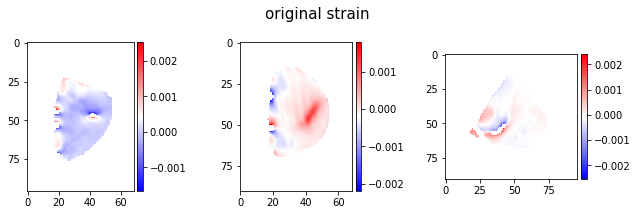

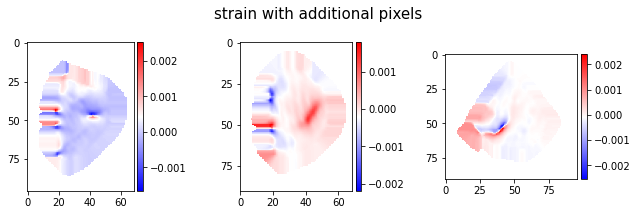

In [61]:
Nb_surface_pixels_added = 10
strain_paraview = add_surface_pixels(strain, Nb_surface_pixels_added = Nb_surface_pixels_added, plot=True)
tilt_comp1_paraview = add_surface_pixels(tilt_comp1, Nb_surface_pixels_added = Nb_surface_pixels_added)
tilt_comp2_paraview = add_surface_pixels(tilt_comp2, Nb_surface_pixels_added = Nb_surface_pixels_added)

In [62]:
module_ortho, phase_ortho = get_cropped_module_phase(obj_ortho, threshold_module=threshold_module,crop=False)
module_ortho = module_ortho/np.max(module_ortho)
np_arrays = {'module_ortho' : module_ortho,
             'phase_ortho' : phase_ortho,
             'strain' : strain,
             'strain_paraview' : strain_paraview,
             'tilt_comp1_paraview' : tilt_comp1_paraview,
             'tilt_comp2_paraview' : tilt_comp2_paraview}
save_vti(np_arrays, 
             voxel_sizes, path_reconstruction)

vti file saved in :  Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5/final_obj/Pd_4_5e16_BCDI_x3_scan5.vti


# Remove bad reconstructions

In [63]:
delete_recon = False

if delete_recon:
    remove_bad_reconstructions(file_list,
                                   index_best_recon,
                                   verbose=True)

removed  Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5/reconstruction_8.npz
removed  Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5/reconstruction_3.npz
removed  Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5/reconstruction_6.npz
removed  Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5/reconstruction_5.npz
removed  Reconstructions_Genetic/Pd_4_5e16_BCDI_x3_scan5/reconstruction_9.npz


# Dev

In [8]:
obj_list.shape

(3, 100, 150, 130)

In [9]:
from skimage.restoration import unwrap_phase as unwrap_phase_skimage

In [58]:
obj_ref = np.copy(obj_list[0])
obj_test = np.copy(obj_list[1])
# obj_test = np.copy(np.conj(obj_list[1][::-1,::-1,::-1]))

# Subpixel_shift between objects
shift = center_of_mass(np.abs(obj_ref)) - center_of_mass(np.abs(obj_test))
print(shift)
obj_test = fftn(obj_test)
obj_test = fourier_shift(obj_test, +shift)
obj_test = ifftn(obj_test)



[1.60312079 1.56419203 1.09170968]


In [79]:
amp_ref = create_diffracted_amplitude(obj_ref)
phase_ref = np.angle(amp_ref)
phase_ref = unwrap_phase_skimage(phase_ref)

amp = create_diffracted_amplitude(obj_test)
phase = np.angle(amp)
phase = unwrap_phase_skimage(phase)


diff = phase - phase_ref
# diff = unwrap_phase_skimage(diff)
diff = diff - diff[tuple(np.array(diff.shape)//2)]

diff_twin = -phase - phase_ref
# diff_twin = unwrap_phase_skimage(diff_twin)
diff_twin = diff_twin - diff_twin[tuple(np.array(diff_twin.shape)//2)]

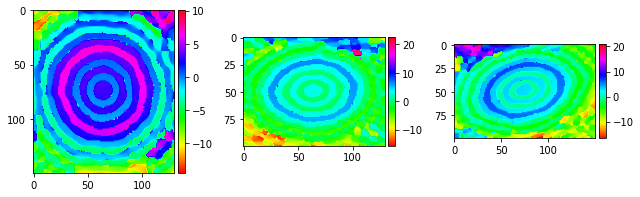

In [80]:
plot_2D_slices_middle_one_array3D(phase_ref, cmap='hsv')#, vmax=2,vmin=-2, fw=4)

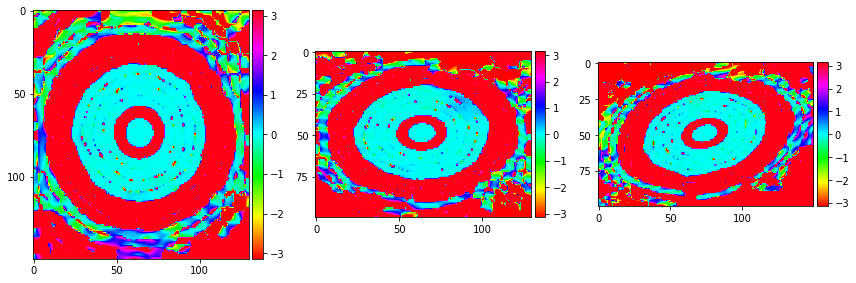

In [81]:
# plot_2D_slices_middle_one_array3D(diff, cmap='bwr', vmax=2,vmin=-2, fw=4)
plot_2D_slices_middle_one_array3D(diff, cmap='hsv', fw=4, vmin=-pi, vmax=pi)

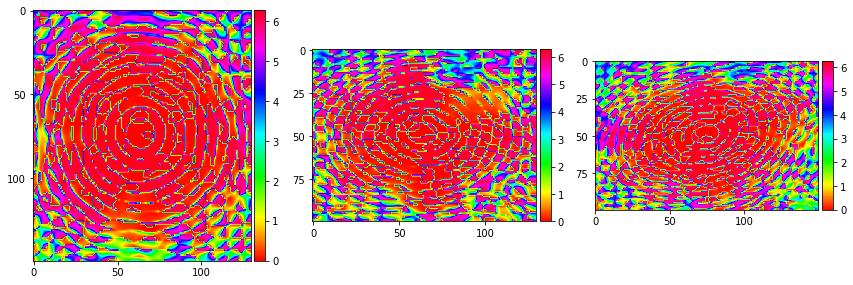

In [84]:
plot_2D_slices_middle_one_array3D(np.mod(diff,2*pi), cmap='hsv', fw=4, vmin=0, vmax=2*pi)

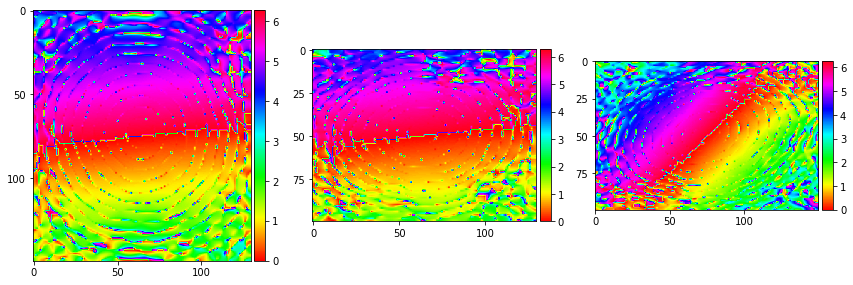

In [85]:
plot_2D_slices_middle_one_array3D(np.mod(diff_twin,2*pi), cmap='hsv', fw=4, vmin=0, vmax=2*pi)

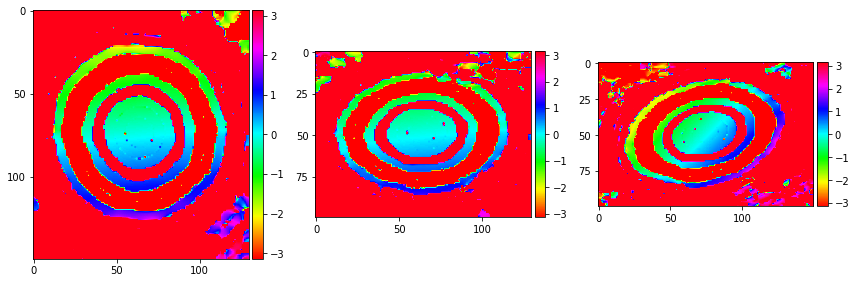

In [82]:
# plot_2D_slices_middle_one_array3D(diff_twin, cmap='bwr', vmax=2,vmin=-2, fw=4)
plot_2D_slices_middle_one_array3D(diff_twin, cmap='hsv', fw=4, vmin=-pi, vmax=pi)

In [13]:
from skimage.registration import phase_cross_correlation
from scipy.ndimage import fourier_shift

In [14]:
phase_cross_correlation(obj[0], obj[1])

(array([0., 0.]), 0.09472126672335367, -3.1133957850121026)

In [15]:
phase_cross_correlation?

In [16]:
center_of_mass_calculation_two_steps??

In [17]:
center_of_mass_calculation_two_steps(obj)

/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/Global_utilities.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  cen[n] += np.nansum(pos[n]*proba)


[50, 75, 65]

In [18]:
shift = center_of_mass(np.abs(obj_list[0])) - center_of_mass(np.abs(obj_list[1]))
print(shift)

[-0.065637    0.2257303  -0.01648596]


In [19]:
test = np.copy(obj_list[1])

In [20]:
test = fourier_shift(test, shift)

In [21]:
center_of_mass(np.abs(obj_list[0])) - center_of_mass(np.abs(test))

array([-0.06563697,  0.22573034, -0.01648592])

In [23]:
x = np.zeros(7)
x[3] = 1

fourier_shift(x, .5)

array([0.        +0.j        , 0.        -0.j        ,
       0.        -0.j        , 0.22252093-0.97492791j,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        ])

In [24]:
fourier_shift?

In [33]:
test = np.copy(obj_list[1])
test = fftn(test)
test = fourier_shift(test, +shift)
test = ifftn(test)

In [34]:
center_of_mass(np.abs(obj_list[0])) - center_of_mass(np.abs(test))

array([-0.00221972,  0.00635376, -0.00103162])